In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_columns', None)

In [2]:
map_df = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
map_df = map_df[['NAME', 'geometry']]
map_df = map_df.rename(columns={'NAME': 'borough'})
map_df['area'] = map_df['geometry'].area
map_df = map_df.to_crs(epsg=4326)
print(map_df.crs)
map_df.head()

epsg:4326


,borough,geometry,area
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07


In [3]:
df_07_city = pd.read_csv('data/2021-07/2021-07-city-of-london-street.csv')
df_07_metro = pd.read_csv('data/2021-07/2021-07-metropolitan-street.csv')
df_07 = df_07_metro.append(df_07_city)
df_07['LSOA name'] = df_07['LSOA name'].map(lambda x: str(x)[:-5])
df_07.head(20)
#print(df_07['LSOA name'].unique())

g_df_07 = pd.DataFrame({'count' : df_07.groupby('LSOA name')['Crime type'].value_counts()}).reset_index()
p_df_07 = g_df_07.pivot(index='LSOA name',columns='Crime type',values='count').reset_index().fillna(0)
g_df_07_count = pd.DataFrame(df_07.groupby('LSOA name')['Crime type'].count()).reset_index()
g_df_07_count = g_df_07_count.rename(columns={'Crime type': 'Crime count'})
crime_df_07 = pd.merge(p_df_07, g_df_07_count, on='LSOA name', how='outer')
crime_df_07 = crime_df_07.rename(columns={'LSOA name': 'borough'})
crime_df_07 = pd.merge(map_df, crime_df_07, on='borough', how='outer')
crime_df_07 = crime_df_07[crime_df_07['geometry'].notna()]
crime_df_07 = pd.DataFrame(crime_df_07)
crime_df_07.head()

,borough,geometry,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,316.0,61.0,63.0,64.0,65.0,12.0,124.0,1.0,76.0,13.0,60.0,64.0,51.0,341.0,1311
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,961.0,20.0,175.0,212.0,156.0,54.0,324.0,20.0,241.0,65.0,122.0,52.0,276.0,979.0,3657
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,625.0,13.0,111.0,132.0,87.0,34.0,178.0,6.0,235.0,17.0,152.0,58.0,218.0,621.0,2487
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,836.0,72.0,95.0,139.0,126.0,25.0,208.0,13.0,212.0,25.0,62.0,37.0,206.0,782.0,2838
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,1043.0,73.0,135.0,157.0,98.0,28.0,219.0,16.0,230.0,42.0,97.0,51.0,364.0,909.0,3462


In [4]:
df_08_city = pd.read_csv('data/2021-08/2021-08-city-of-london-street.csv')
df_08_metro = pd.read_csv('data/2021-08/2021-08-metropolitan-street.csv')
df_08 = df_08_metro.append(df_08_city)
df_08['LSOA name'] = df_08['LSOA name'].map(lambda x: str(x)[:-5])
df_08.head(20)
#print(df_08['LSOA name'].unique())

g_df_08 = pd.DataFrame({'count' : df_08.groupby('LSOA name')['Crime type'].value_counts()}).reset_index()
p_df_08 = g_df_08.pivot(index='LSOA name',columns='Crime type',values='count').reset_index().fillna(0)
g_df_08_count = pd.DataFrame(df_08.groupby('LSOA name')['Crime type'].count()).reset_index()
g_df_08_count = g_df_08_count.rename(columns={'Crime type': 'Crime count'})
crime_df_08 = pd.merge(p_df_08, g_df_08_count, on='LSOA name', how='outer')
crime_df_08 = crime_df_08.rename(columns={'LSOA name': 'borough'})
crime_df_08 = pd.merge(map_df, crime_df_08, on='borough', how='outer')
crime_df_08 = crime_df_08[crime_df_08['geometry'].notna()]
crime_df_08 = pd.DataFrame(crime_df_08)
crime_df_08.head()

,borough,geometry,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,270.0,73.0,56.0,65.0,60.0,8.0,110.0,6.0,71.0,13.0,47.0,48.0,80.0,259.0,1166
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,931.0,14.0,184.0,208.0,218.0,42.0,315.0,33.0,218.0,67.0,108.0,53.0,403.0,894.0,3688
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,496.0,23.0,97.0,137.0,73.0,23.0,161.0,7.0,123.0,20.0,186.0,63.0,244.0,545.0,2198
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,754.0,46.0,91.0,168.0,97.0,23.0,209.0,10.0,136.0,31.0,64.0,32.0,257.0,683.0,2601
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,978.0,42.0,138.0,158.0,106.0,22.0,218.0,11.0,160.0,44.0,83.0,39.0,398.0,794.0,3191


In [5]:
df_09_city = pd.read_csv('data/2021-09/2021-09-city-of-london-street.csv')
df_09_metro = pd.read_csv('data/2021-09/2021-09-metropolitan-street.csv')
df_09 = df_09_metro.append(df_09_city)
df_09['LSOA name'] = df_09['LSOA name'].map(lambda x: str(x)[:-5])
df_09.head(20)
#print(df_09['LSOA name'].unique())

g_df_09 = pd.DataFrame({'count' : df_09.groupby('LSOA name')['Crime type'].value_counts()}).reset_index()
p_df_09 = g_df_09.pivot(index='LSOA name',columns='Crime type',values='count').reset_index().fillna(0)
g_df_09_count = pd.DataFrame(df_09.groupby('LSOA name')['Crime type'].count()).reset_index()
g_df_09_count = g_df_09_count.rename(columns={'Crime type': 'Crime count'})
crime_df_09 = pd.merge(p_df_09, g_df_09_count, on='LSOA name', how='outer')
crime_df_09 = crime_df_09.rename(columns={'LSOA name': 'borough'})
crime_df_09 = pd.merge(map_df, crime_df_09, on='borough', how='outer')
crime_df_09 = crime_df_09[crime_df_09['geometry'].notna()]
crime_df_09 = pd.DataFrame(crime_df_09)
crime_df_09.head()

,borough,geometry,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,302.0,57.0,50.0,75.0,77.0,15.0,117.0,5.0,63.0,14.0,46.0,29.0,155.0,301.0,1306
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,874.0,15.0,182.0,203.0,133.0,32.0,309.0,15.0,190.0,83.0,96.0,47.0,424.0,902.0,3505
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,558.0,17.0,110.0,144.0,104.0,33.0,184.0,14.0,159.0,65.0,164.0,59.0,306.0,585.0,2502
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,733.0,73.0,111.0,143.0,85.0,33.0,218.0,13.0,157.0,26.0,51.0,36.0,237.0,685.0,2601
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,890.0,39.0,147.0,175.0,94.0,28.0,262.0,16.0,205.0,54.0,96.0,46.0,384.0,895.0,3331


In [6]:
df_10_city = pd.read_csv('data/2021-10/2021-10-city-of-london-street.csv')
df_10_metro = pd.read_csv('data/2021-10/2021-10-metropolitan-street.csv')
df_10 = df_10_metro.append(df_10_city)
df_10['LSOA name'] = df_10['LSOA name'].map(lambda x: str(x)[:-5])
df_10.head(20)
#print(df_10['LSOA name'].unique())

g_df_10 = pd.DataFrame({'count' : df_10.groupby('LSOA name')['Crime type'].value_counts()}).reset_index()
p_df_10 = g_df_10.pivot(index='LSOA name',columns='Crime type',values='count').reset_index().fillna(0)
g_df_10_count = pd.DataFrame(df_10.groupby('LSOA name')['Crime type'].count()).reset_index()
g_df_10_count = g_df_10_count.rename(columns={'Crime type': 'Crime count'})
crime_df_10 = pd.merge(p_df_10, g_df_10_count, on='LSOA name', how='outer')
crime_df_10 = crime_df_10.rename(columns={'LSOA name': 'borough'})
crime_df_10 = pd.merge(map_df, crime_df_10, on='borough', how='outer')
crime_df_10 = crime_df_10[crime_df_10['geometry'].notna()]
crime_df_10 = pd.DataFrame(crime_df_10)
crime_df_10.head()


,borough,geometry,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,289.0,31.0,71.0,75.0,48.0,12.0,125.0,9.0,75.0,16.0,42.0,51.0,112.0,310.0,1266
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,720.0,14.0,172.0,231.0,163.0,39.0,267.0,18.0,201.0,85.0,106.0,64.0,442.0,1094.0,3616
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,467.0,12.0,131.0,146.0,70.0,31.0,201.0,12.0,181.0,27.0,202.0,67.0,321.0,637.0,2505
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,657.0,64.0,127.0,139.0,101.0,22.0,215.0,10.0,144.0,24.0,80.0,45.0,229.0,672.0,2529
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,884.0,46.0,167.0,181.0,175.0,37.0,271.0,14.0,203.0,68.0,84.0,74.0,346.0,777.0,3327


In [7]:
describe_crime_df = crime_df_07.append(crime_df_08)
describe_crime_df = describe_crime_df.append(crime_df_09)
describe_crime_df = describe_crime_df.append(crime_df_10)
describe_crime_df = describe_crime_df.reset_index()
describe_crime_df['Burglary_Theft'] = describe_crime_df['Bicycle theft'] + describe_crime_df['Burglary'] + describe_crime_df['Other theft']
describe_crime_df.describe()

,index,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count,Burglary_Theft
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,16.000000,4.767881e+07,702.750000,62.954545,132.583333,137.878788,98.098485,25.954545,259.113636,12.454545,159.272727,61.537879,91.287879,107.287879,259.280303,641.477273,2751.931818,454.651515
std,9.558179,3.237493e+07,291.800789,49.734388,52.822046,44.285512,44.103428,16.494674,174.886862,6.793984,58.175844,45.549806,44.334353,136.672089,101.642564,215.831517,1042.847747,237.660158
min,0.000000,2.903926e+06,77.000000,6.000000,18.000000,24.000000,20.000000,4.000000,78.000000,1.000000,40.000000,10.000000,29.000000,9.000000,14.000000,85.000000,654.000000,126.000000
25%,8.000000,2.681004e+07,474.250000,22.750000,90.750000,109.750000,66.500000,18.000000,160.250000,8.000000,119.250000,26.000000,65.000000,37.000000,189.000000,489.500000,2013.750000,272.750000
50%,16.000000,3.762474e+07,726.500000,44.000000,131.000000,142.000000,90.500000,23.000000,232.500000,11.000000,163.000000,51.000000,83.500000,60.000000,254.500000,668.500000,2843.500000,433.000000
75%,24.000000,5.641922e+07,853.500000,107.000000,178.000000,167.250000,116.250000,31.250000,295.000000,17.000000,195.250000,83.000000,101.000000,116.000000,321.500000,805.000000,3357.750000,536.500000
max,32.000000,1.501349e+08,1719.000000,188.000000,236.000000,258.000000,243.000000,134.000000,1338.000000,34.000000,367.000000,270.000000,295.000000,1017.000000,533.000000,1161.000000,6894.000000,1674.000000


In [8]:
describe_crime_df

,index,borough,geometry,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count,Burglary_Theft
0,0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,316.0,61.0,63.0,64.0,65.0,12.0,124.0,1.0,76.0,13.0,60.0,64.0,51.0,341.0,1311,248.0
1,1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,961.0,20.0,175.0,212.0,156.0,54.0,324.0,20.0,241.0,65.0,122.0,52.0,276.0,979.0,3657,519.0
2,2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,625.0,13.0,111.0,132.0,87.0,34.0,178.0,6.0,235.0,17.0,152.0,58.0,218.0,621.0,2487,302.0
3,3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,836.0,72.0,95.0,139.0,126.0,25.0,208.0,13.0,212.0,25.0,62.0,37.0,206.0,782.0,2838,375.0
4,4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,1043.0,73.0,135.0,157.0,98.0,28.0,219.0,16.0,230.0,42.0,97.0,51.0,364.0,909.0,3462,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,28,Hackney,"POLYGON ((-0.09766 51.57365, -0.09756 51.57368...",1.904903e+07,799.0,146.0,203.0,163.0,117.0,26.0,338.0,15.0,175.0,137.0,95.0,397.0,291.0,852.0,3754,687.0
128,29,Haringey,"POLYGON ((-0.09766 51.57365, -0.09780 51.57362...",2.959839e+07,709.0,43.0,184.0,150.0,82.0,23.0,240.0,9.0,193.0,83.0,64.0,103.0,511.0,691.0,3085,467.0
129,30,Newham,"MULTIPOLYGON (((0.07549 51.52982, 0.07546 51.5...",3.620173e+07,838.0,50.0,150.0,184.0,186.0,44.0,435.0,18.0,185.0,128.0,161.0,261.0,396.0,918.0,3954,635.0
130,31,Barking and Dagenham,"MULTIPOLYGON (((0.07317 51.52937, 0.07316 51.5...",3.610781e+07,441.0,18.0,118.0,116.0,116.0,40.0,153.0,12.0,135.0,54.0,79.0,45.0,200.0,561.0,2088,289.0


In [9]:
# crime_df_0708 = crime_df_08.copy(deep = True)
# crime_df_0708.iloc[:, 3:] = ((crime_df_08.iloc[:, 3:]/crime_df_07.iloc[:, 3:])-1) * 100
# crime_df_0708['month'] = 7
# crime_df_0708.head()

In [10]:
# crime_df_0809 = crime_df_09.copy(deep = True)
# crime_df_0809.iloc[:, 3:] = ((crime_df_09.iloc[:, 3:]/crime_df_08.iloc[:, 3:])-1) *100
# crime_df_0809['month'] = 8
# crime_df_0809.head()

In [11]:
# crime_df_0910 = crime_df_10.copy(deep = True)
# crime_df_0910.iloc[:, 3:] = ((crime_df_10.iloc[:, 3:]/crime_df_09.iloc[:, 3:])-1) *100
# crime_df_0910['month'] = 9
# crime_df_0910.head()

In [12]:
plot_crime_df = crime_df_07.append(crime_df_08)
plot_crime_df = plot_crime_df.append(crime_df_09)
plot_crime_df = plot_crime_df.append(crime_df_10)
plot_crime_df = plot_crime_df.reset_index()
plot_crime_df = plot_crime_df.groupby(['borough']).sum()
plot_crime_df = pd.merge(map_df, plot_crime_df, on=['borough'], how='outer')
plot_crime_df['Crime_month'] = plot_crime_df['Crime count']/4
#plot_crime_df

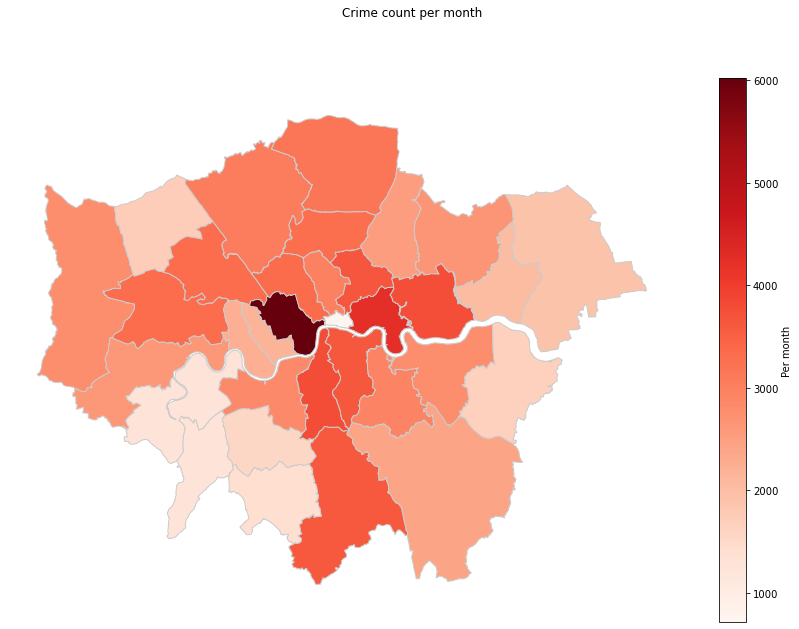

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plot_crime_df.plot(column='Crime_month', 
               cmap='Reds', 
               linewidth=1, 
               ax=ax, 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Per month"})
ax.axis('off')
plt.suptitle('Crime count per month')
plt.savefig('Crime_count_per_month.png')
plt.show()


In [14]:
crime_df_describe = crime_df_07.append(crime_df_08)
crime_df_describe = crime_df_describe.append(crime_df_09)
crime_df_describe = crime_df_describe.append(crime_df_10)
crime_df_describe.describe()

,area,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crime count
count,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,4.767881e+07,702.750000,62.954545,132.583333,137.878788,98.098485,25.954545,259.113636,12.454545,159.272727,61.537879,91.287879,107.287879,259.280303,641.477273,2751.931818
std,3.237493e+07,291.800789,49.734388,52.822046,44.285512,44.103428,16.494674,174.886862,6.793984,58.175844,45.549806,44.334353,136.672089,101.642564,215.831517,1042.847747
min,2.903926e+06,77.000000,6.000000,18.000000,24.000000,20.000000,4.000000,78.000000,1.000000,40.000000,10.000000,29.000000,9.000000,14.000000,85.000000,654.000000
25%,2.681004e+07,474.250000,22.750000,90.750000,109.750000,66.500000,18.000000,160.250000,8.000000,119.250000,26.000000,65.000000,37.000000,189.000000,489.500000,2013.750000
50%,3.762474e+07,726.500000,44.000000,131.000000,142.000000,90.500000,23.000000,232.500000,11.000000,163.000000,51.000000,83.500000,60.000000,254.500000,668.500000,2843.500000
75%,5.641922e+07,853.500000,107.000000,178.000000,167.250000,116.250000,31.250000,295.000000,17.000000,195.250000,83.000000,101.000000,116.000000,321.500000,805.000000,3357.750000
max,1.501349e+08,1719.000000,188.000000,236.000000,258.000000,243.000000,134.000000,1338.000000,34.000000,367.000000,270.000000,295.000000,1017.000000,533.000000,1161.000000,6894.000000


# Count

In [15]:
# crime_df = crime_df_0708.append(crime_df_0809)
# crime_df = crime_df.append(crime_df_0910)
# crime_df = crime_df.reset_index()
# crime_df = gpd.GeoDataFrame(crime_df, crs="EPSG:4326", geometry=crime_df['geometry'])
# crime_df

# For count
crime_df_10 = pd.merge(crime_df_10, crime_df_09, on='borough', how='outer')
crime_df_09 = pd.merge(crime_df_09, crime_df_08, on='borough', how='outer')
crime_df_08 = pd.merge(crime_df_08, crime_df_07, on='borough', how='outer')

crime_df_08
# crime_df_07['month'] = 7
crime_df_08['month'] = 8
crime_df_09['month'] = 9
crime_df_10['month'] = 10
# crime_df = crime_df_07.append(crime_df_08)
crime_df = crime_df_08.append(crime_df_09)
crime_df = crime_df.append(crime_df_10)
crime_df = crime_df.reset_index()
crime_df = gpd.GeoDataFrame(crime_df, crs="EPSG:4326", geometry=crime_df['geometry_x'])
crime_df['Burglary_Theft_x'] = crime_df['Bicycle theft_x'] + crime_df['Burglary_x'] + crime_df['Other theft_x']
crime_df['Burglary_Theft_y'] = crime_df['Bicycle theft_y'] + crime_df['Burglary_y'] + crime_df['Other theft_y']
crime_df

,index,borough,geometry_x,area_x,Anti-social behaviour_x,Bicycle theft_x,Burglary_x,Criminal damage and arson_x,Drugs_x,Other crime_x,Other theft_x,Possession of weapons_x,Public order_x,Robbery_x,Shoplifting_x,Theft from the person_x,Vehicle crime_x,Violence and sexual offences_x,Crime count_x,geometry_y,area_y,Anti-social behaviour_y,Bicycle theft_y,Burglary_y,Criminal damage and arson_y,Drugs_y,Other crime_y,Other theft_y,Possession of weapons_y,Public order_y,Robbery_y,Shoplifting_y,Theft from the person_y,Vehicle crime_y,Violence and sexual offences_y,Crime count_y,month,geometry,Burglary_Theft_x,Burglary_Theft_y
0,0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,270.0,73.0,56.0,65.0,60.0,8.0,110.0,6.0,71.0,13.0,47.0,48.0,80.0,259.0,1166,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,316.0,61.0,63.0,64.0,65.0,12.0,124.0,1.0,76.0,13.0,60.0,64.0,51.0,341.0,1311,8,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",239.0,248.0
1,1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,931.0,14.0,184.0,208.0,218.0,42.0,315.0,33.0,218.0,67.0,108.0,53.0,403.0,894.0,3688,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,961.0,20.0,175.0,212.0,156.0,54.0,324.0,20.0,241.0,65.0,122.0,52.0,276.0,979.0,3657,8,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",513.0,519.0
2,2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,496.0,23.0,97.0,137.0,73.0,23.0,161.0,7.0,123.0,20.0,186.0,63.0,244.0,545.0,2198,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,625.0,13.0,111.0,132.0,87.0,34.0,178.0,6.0,235.0,17.0,152.0,58.0,218.0,621.0,2487,8,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",281.0,302.0
3,3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,754.0,46.0,91.0,168.0,97.0,23.0,209.0,10.0,136.0,31.0,64.0,32.0,257.0,683.0,2601,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,836.0,72.0,95.0,139.0,126.0,25.0,208.0,13.0,212.0,25.0,62.0,37.0,206.0,782.0,2838,8,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",346.0,375.0
4,4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,978.0,42.0,138.0,158.0,106.0,22.0,218.0,11.0,160.0,44.0,83.0,39.0,398.0,794.0,3191,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,1043.0,73.0,135.0,157.0,98.0,28.0,219.0,16.0,230.0,42.0,97.0,51.0,364.0,909.0,3462,8,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",398.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,28,Hackney,"POLYGON ((-0.09766 51.57365, -0.09756 51.57368...",1.904903e+07,799.0,146.0,203.0,163.0,117.0,26.0,338.0,15.0,175.0,137.0,95.0,397.0,291.0,852.0,3754,"POLYGON ((-0.09766 51.57365, -0.09756 51.57368...",1.904903e+07,811.0,165.0,208.0,153.0,83.0,25.0,366.0,21.0,196.0,148.0,66.0,314.0,287.0,731.0,3574,10,"POLYGON ((-0.09766 51.57365, -0.09756 51.57368...",687.0,739.0
95,29,Haringey,"POLYGON ((-0.09766 51.57365, -0.09780 51.57362...",2.959839e+07,709.0,43.0,184.0,150.0,82.0,23.0,240.0,9.0,193.0,83.0,64.0,103.0,511.0,691.0,3085,"POLYGON ((-0.09766 51.57365, -0.09780 51.57362...",2.959839e+07,840.0,36.0,227.0,116.0,65.0,29.0,252.0,8.0,185.0,114.0,83.0,88.0,479.0,795.0,3317,10,"POLYGON ((-0.09766 51.57365, -0.09780 51.57362...",467.0,515.0
96,30,Newham,"MULTIPOLYGON (((0.07549 51.52982, 0.07546 51.5...",3.620173e+07,838.0,50.0,150.0,184.0,186.0,44.0,435.0,18.0,185.0,128.0,161.0,261.0,396.0,918.0,3954,"MULTIPOLYGON (((0.07549 51.52982, 0.07546 51.5...",3.620173e+07,855.0,49.0,125.0,195.0,138.0,43.0,394.0,13.0,164.0,104.0,171.0,222.0,325.0,844.0,3642,10,"MULTIPOLYGON (((0.07549 51.52982, 0.07546 51.5...",635.0,568.0
97,31,Barking and Dagenham,"MULTIPOLYGON (((0.07317 51.52937, 0.07316 51.5...",3.610781e+07,441.0,18.0,118.0,116.0,116.0,40.0,153.0,12.0,135.0,54.0,79.0,45.0,200.0,561.0,2088,"MULTIPOLYGON (((0.07317 51.5

==============================================

In [16]:
ss_df_07_city = pd.read_csv('data/2021-07/2021-07-city-of-london-stop-and-search.csv')
ss_df_07_metro = pd.read_csv('data/2021-07/2021-07-metropolitan-stop-and-search.csv')
ss_df_07 = ss_df_07_metro.append(ss_df_07_city)
ss_df_07['month'] = 7
ss_df_07.info()

ss_df_08_city = pd.read_csv('data/2021-08/2021-08-city-of-london-stop-and-search.csv')
ss_df_08_metro = pd.read_csv('data/2021-08/2021-08-metropolitan-stop-and-search.csv')
ss_df_08 = ss_df_08_metro.append(ss_df_08_city)
ss_df_08['month'] = 8
ss_df_08.info()

ss_df_09_city = pd.read_csv('data/2021-09/2021-09-city-of-london-stop-and-search.csv')
ss_df_09_metro = pd.read_csv('data/2021-09/2021-09-metropolitan-stop-and-search.csv')
ss_df_09 = ss_df_09_metro.append(ss_df_09_city)
ss_df_09['month'] = 9
ss_df_09.info()

ss_df_10_city = pd.read_csv('data/2021-10/2021-10-city-of-london-stop-and-search.csv')
ss_df_10_metro = pd.read_csv('data/2021-10/2021-10-metropolitan-stop-and-search.csv')
ss_df_10 = ss_df_10_metro.append(ss_df_10_city)
ss_df_10['month'] = 10
ss_df_10.info()


ss_df = ss_df_07.append(ss_df_08)
ss_df = ss_df.append(ss_df_09)
ss_df = ss_df.append(ss_df_10)

# drop na
ss_df = ss_df.dropna(axis=0, subset=['Longitude', 'Latitude'])

# creat geometry
ss_gdf = gpd.GeoDataFrame(ss_df, geometry=gpd.points_from_xy(ss_df.Longitude, ss_df.Latitude))
ss_gdf.crs = 'epsg:4326'
ss_gdf = ss_gdf.to_crs(epsg=4326)

ss_gdf = ss_gdf.reset_index()
ss_gdf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15902 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      15902 non-null  object 
 1   Date                                      15902 non-null  object 
 2   Part of a policing operation              15673 non-null  float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  14238 non-null  float64
 5   Longitude                                 14238 non-null  float64
 6   Gender                                    15735 non-null  object 
 7   Age range                                 13833 non-null  object 
 8   Self-defined ethnicity                    15726 non-null  object 
 9   Officer-defined ethnicity                 15563 non-null  object 
 10  Legislation                         

,index,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,geometry
0,0,Person search,2021-06-30T23:00:00+00:00,0.0,NaN,51.527473,-0.183443,Male,NaN,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.18344 51.52747)
1,1,Person search,2021-06-30T23:06:00+00:00,0.0,NaN,51.505077,-0.407705,Male,over 34,Black/African/Caribbean/Black British - Caribbean,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,7,POINT (-0.40770 51.50508)
2,2,Person search,2021-06-30T23:10:00+00:00,0.0,NaN,51.483407,-0.025281,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.02528 51.48341)
3,3,Person search,2021-06-30T23:20:00+00:00,0.0,NaN,51.481480,-0.025652,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.02565 51.48148)
4,4,Person search,2021-06-30T23:20:00+00:00,0.0,NaN,51.513291,-0.381737,Male,NaN,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.38174 51.51329)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58287,159,Person search,2021-10-31T04:45:47+00:00,NaN,NaN,51.513132,-0.090710,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False,10,POINT (-0.09071 51.51313)
58288,160,Person and Vehicle search,2021-10-31T05:08:50+00:00,NaN,NaN,51.510873,-0.105561,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,10,POINT (-0.10556 51.51087)
58289,161,Person search,2021-10-31T05:34:49+00:00,NaN,NaN,51.517576,-0.079786,Female,18-24,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,10,POINT (-0.07979 51.51758)
58290,162,Person search,2021-10-31T07:22:22+00:00,NaN,NaN,51.511749,-0.108018,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,True,10,POINT (-0.10802 51.51175)


In [17]:
# for ss_index, ss_row in ss_gdf.iterrows():
#     #print(ss_row['geometry'])
#     for borough_index, borough_row in map_df.iterrows():
#         if borough_row['geometry'].contains(ss_row['geometry']):
#             ss_gdf.loc[ss_index,'borough'] = borough_row['borough']
#             #print(ss_index, ss_gdf.loc[ss_index,'borough'])
            
# ss_gdf.to_file(driver = 'ESRI Shapefile', filename= "geodata/result.shp")

In [18]:
ss_gdf

,index,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,geometry
0,0,Person search,2021-06-30T23:00:00+00:00,0.0,NaN,51.527473,-0.183443,Male,NaN,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.18344 51.52747)
1,1,Person search,2021-06-30T23:06:00+00:00,0.0,NaN,51.505077,-0.407705,Male,over 34,Black/African/Caribbean/Black British - Caribbean,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,7,POINT (-0.40770 51.50508)
2,2,Person search,2021-06-30T23:10:00+00:00,0.0,NaN,51.483407,-0.025281,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.02528 51.48341)
3,3,Person search,2021-06-30T23:20:00+00:00,0.0,NaN,51.481480,-0.025652,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.02565 51.48148)
4,4,Person search,2021-06-30T23:20:00+00:00,0.0,NaN,51.513291,-0.381737,Male,NaN,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,7,POINT (-0.38174 51.51329)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58287,159,Person search,2021-10-31T04:45:47+00:00,NaN,NaN,51.513132,-0.090710,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False,10,POINT (-0.09071 51.51313)
58288,160,Person and Vehicle search,2021-10-31T05:08:50+00:00,NaN,NaN,51.510873,-0.105561,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,10,POINT (-0.10556 51.51087)
58289,161,Person search,2021-10-31T05:34:49+00:00,NaN,NaN,51.517576,-0.079786,Female,18-24,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,10,POINT (-0.07979 51.51758)
58290,162,Person search,2021-10-31T07:22:22+00:00,NaN,NaN,51.511749,-0.108018,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,True,10,POINT (-0.10802 51.51175)


In [19]:
final_ss_gdf = gpd.read_file('geodata/result.shp')
final_ss_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58292 entries, 0 to 58291
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       58292 non-null  int64   
 1   Type        58292 non-null  object  
 2   Date        58292 non-null  object  
 3   Part of a   57596 non-null  float64 
 4   Policing o  0 non-null      object  
 5   Latitude    58292 non-null  float64 
 6   Longitude   58292 non-null  float64 
 7   Gender      57589 non-null  object  
 8   Age range   50485 non-null  object  
 9   Self-defin  57556 non-null  object  
 10  Officer-de  56993 non-null  object  
 11  Legislatio  58292 non-null  object  
 12  Object of   58138 non-null  object  
 13  Outcome     58292 non-null  object  
 14  Outcome li  696 non-null    object  
 15  Removal of  696 non-null    object  
 16  month       58292 non-null  int64   
 17  borough     58169 non-null  object  
 18  geometry    58292 non-null  geometry
d

In [20]:
plot_ss_df = pd.DataFrame({'count' : final_ss_gdf.groupby(['borough'])['Object of'].value_counts()}).reset_index()
plot_ss_df = plot_ss_df.pivot(index=['borough'],columns='Object of',values='count').reset_index().fillna(0)
plot_ss_df = pd.merge(map_df, plot_ss_df, on='borough', how='outer')

plot_ss_df = plot_ss_df.drop(['area'], axis=1)

plot_ss_df['ss_count'] = plot_ss_df.sum(axis=1)
plot_ss_df['ss_count'] = plot_ss_df['ss_count']/4
plot_ss_df

/tmp/ipykernel_122/219574814.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot_ss_df['ss_count'] = plot_ss_df.sum(axis=1)


,borough,geometry,Anything to threaten or harm anyone,Article for use in theft,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Fireworks,Offensive weapons,Stolen goods,ss_count
0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",0.0,0.0,3.0,615.0,41.0,1.0,10.0,83.0,52.0,201.25
1,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",50.0,0.0,10.0,1950.0,143.0,20.0,1.0,631.0,260.0,766.25
2,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",17.0,0.0,26.0,1156.0,136.0,4.0,4.0,237.0,225.0,451.25
3,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",1.0,0.0,7.0,1292.0,64.0,4.0,2.0,193.0,108.0,417.75
4,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",1.0,0.0,17.0,1541.0,73.0,19.0,22.0,247.0,132.0,513.00
5,Havering,"POLYGON ((0.15869 51.51219, 0.15871 51.51224, ...",1.0,0.0,13.0,894.0,75.0,4.0,0.0,150.0,154.0,322.75
6,Hillingdon,"POLYGON ((-0.40407 51.61318, -0.40388 51.61229...",5.0,0.0,13.0,1311.0,65.0,21.0,10.0,158.0,147.0,432.50
7,Harrow,"POLYGON ((-0.40407 51.61318, -0.40320 51.61318...",4.0,0.0,7.0,679.0,40.0,1.0,8.0,90.0,94.0,230.75
8,Brent,"POLYGON ((-0.19657 51.52765, -0.19685 51.52773...",0.0,0.0,2.0,1686.0,72.0,22.0,6.0,369.0,186.0,585.75
9,Barnet,"POLYGON ((-0.19990 51.67017, -0.19970 51.66986...",1.0,0.0,6.0,768.0,73.0,12.0,15.0,257.0,115.0,311.75


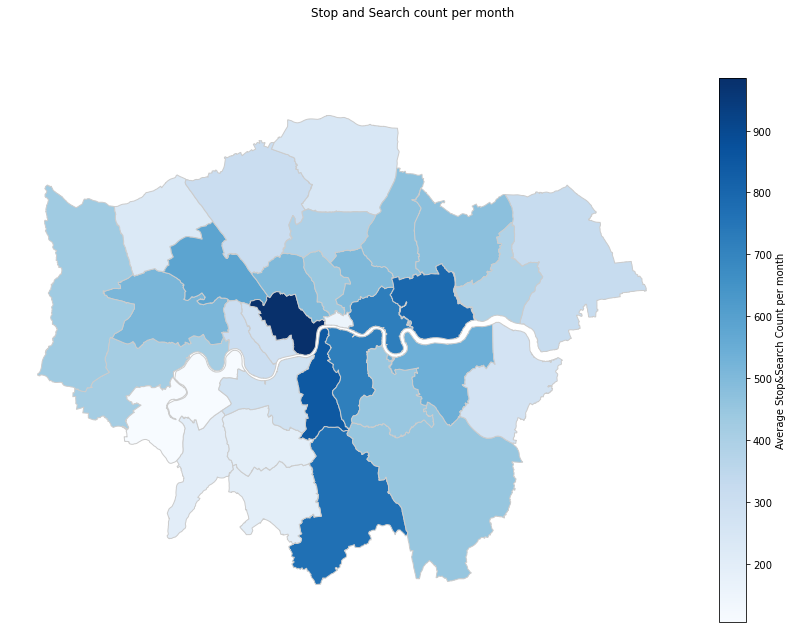

In [21]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plot_ss_df.plot(column='ss_count', 
               cmap='Blues', 
               linewidth=1, 
               ax=ax, 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Average Stop&Search Count per month"})
ax.axis('off')
plt.suptitle('Stop and Search count per month')
plt.savefig('SS_count_per_month.png')
plt.show()


In [22]:
g_final_ss_df = pd.DataFrame({'count' : final_ss_gdf.groupby(['borough','month'])['Object of'].value_counts()}).reset_index()
g_final_ss_df

,borough,month,Object of,count
0,Barking and Dagenham,7,Controlled drugs,311
1,Barking and Dagenham,7,Offensive weapons,44
2,Barking and Dagenham,7,Stolen goods,40
3,Barking and Dagenham,7,Evidence of offences under the Act,20
4,Barking and Dagenham,7,Firearms,2
...,...,...,...,...
839,Westminster,10,Fireworks,54
840,Westminster,10,Evidence of offences under the Act,30
841,Westminster,10,Firearms,15
842,Westminster,10,Anything to threaten or harm anyone,4


In [23]:
p_g_final_ss_df = g_final_ss_df.pivot(index=['borough','month'],columns='Object of',values='count').reset_index().fillna(0)
p_g_final_ss_df['ss_count'] = p_g_final_ss_df.sum(axis=1) - p_g_final_ss_df['month']
p_g_final_ss_df

/tmp/ipykernel_122/2361943433.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p_g_final_ss_df['ss_count'] = p_g_final_ss_df.sum(axis=1) - p_g_final_ss_df['month']


Object of,borough,month,Anything to threaten or harm anyone,Article for use in theft,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Fireworks,Offensive weapons,Stolen goods,ss_count
0,Barking and Dagenham,7,0.0,0.0,0.0,311.0,20.0,2.0,1.0,44.0,40.0,418.0
1,Barking and Dagenham,8,0.0,0.0,1.0,240.0,10.0,0.0,0.0,53.0,20.0,324.0
2,Barking and Dagenham,9,0.0,0.0,1.0,299.0,16.0,2.0,0.0,45.0,22.0,385.0
3,Barking and Dagenham,10,13.0,0.0,9.0,280.0,12.0,4.0,0.0,60.0,34.0,412.0
4,Barnet,7,0.0,0.0,2.0,217.0,32.0,6.0,0.0,66.0,29.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Wandsworth,10,23.0,0.0,3.0,263.0,11.0,3.0,5.0,63.0,38.0,409.0
128,Westminster,7,2.0,0.0,1.0,537.0,27.0,6.0,0.0,159.0,212.0,944.0
129,Westminster,8,0.0,1.0,66.0,545.0,51.0,9.0,0.0,181.0,220.0,1073.0
130,Westminster,9,4.0,0.0,12.0,555.0,19.0,4.0,1.0,135.0,196.0,926.0


In [24]:
p_g_final_ss_df = p_g_final_ss_df[['borough','month','Controlled drugs', 'Evidence of offences under the Act', 'Offensive weapons', 'Stolen goods', 'ss_count']]
p_g_final_ss_df['nw'] = p_g_final_ss_df['Evidence of offences under the Act']+p_g_final_ss_df['Stolen goods']
p_g_final_ss_df.describe()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Object of,month,Controlled drugs,Evidence of offences under the Act,Offensive weapons,Stolen goods,ss_count,nw
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,8.500000,284.378788,17.575758,72.053030,50.825758,439.515152,68.401515
std,1.122293,141.856638,8.529358,50.809826,40.064165,224.356671,44.811711
min,7.000000,50.000000,0.000000,6.000000,6.000000,84.000000,14.000000
25%,7.750000,166.500000,12.000000,37.000000,25.500000,269.000000,37.000000
50%,8.500000,275.000000,16.000000,56.500000,40.500000,413.000000,60.000000
75%,9.250000,369.500000,21.000000,93.250000,62.750000,541.750000,87.250000
max,10.000000,669.000000,51.000000,253.000000,241.000000,1073.000000,271.000000


In [25]:
# ss_df_0708 = p_g_final_ss_df[p_g_final_ss_df['month']==7].copy(deep = True).reset_index().drop(["index"],axis=1)
# ss_df_0708
# ss_df_0708.iloc[:, 2:] = ((p_g_final_ss_df[p_g_final_ss_df['month']==8].reset_index().drop(["index"],axis=1).iloc[:, 2:]/p_g_final_ss_df[p_g_final_ss_df['month']==7].reset_index().drop(["index"],axis=1).iloc[:, 2:]) -1)*100
# ss_df_0708['month'] = 7
# ss_df_0708.head()

In [26]:
# ss_df_0809 = p_g_final_ss_df[p_g_final_ss_df['month']==8].copy(deep = True).reset_index().drop(["index"],axis=1)
# ss_df_0809
# ss_df_0809.iloc[:, 2:] = ((p_g_final_ss_df[p_g_final_ss_df['month']==9].reset_index().drop(["index"],axis=1).iloc[:, 2:]/p_g_final_ss_df[p_g_final_ss_df['month']==8].reset_index().drop(["index"],axis=1).iloc[:, 2:]) -1)*100
# ss_df_0809['month'] = 8
# ss_df_0809.head()

In [27]:
# ss_df_0910 = p_g_final_ss_df[p_g_final_ss_df['month']==9].copy(deep = True).reset_index().drop(["index"],axis=1)
# ss_df_0910
# ss_df_0910.iloc[:, 2:] = ((p_g_final_ss_df[p_g_final_ss_df['month']==10].reset_index().drop(["index"],axis=1).iloc[:, 2:]/p_g_final_ss_df[p_g_final_ss_df['month']==9].reset_index().drop(["index"],axis=1).iloc[:, 2:]) -1)*100
# ss_df_0910['month'] = 9
# ss_df_0910.head()

In [28]:
# ss_df_minus = ss_df_0708.append(ss_df_0809)
# ss_df_minus = ss_df_minus.append(ss_df_0910)
# ss_df_minus

In [29]:
# df = pd.merge(crime_df, ss_df_minus, on=['borough','month'], how='outer')
# df
# print(df)

In [30]:
# df = pd.merge(crime_df, ss_df_minus, on=['borough','month'], how='outer')
# df

In [31]:
# count
df = pd.merge(crime_df, p_g_final_ss_df, on=['borough','month'], how='outer')
df

,index,borough,geometry_x,area_x,Anti-social behaviour_x,Bicycle theft_x,Burglary_x,Criminal damage and arson_x,Drugs_x,Other crime_x,Other theft_x,Possession of weapons_x,Public order_x,Robbery_x,Shoplifting_x,Theft from the person_x,Vehicle crime_x,Violence and sexual offences_x,Crime count_x,geometry_y,area_y,Anti-social behaviour_y,Bicycle theft_y,Burglary_y,Criminal damage and arson_y,Drugs_y,Other crime_y,Other theft_y,Possession of weapons_y,Public order_y,Robbery_y,Shoplifting_y,Theft from the person_y,Vehicle crime_y,Violence and sexual offences_y,Crime count_y,month,geometry,Burglary_Theft_x,Burglary_Theft_y,Controlled drugs,Evidence of offences under the Act,Offensive weapons,Stolen goods,ss_count,nw
0,0.0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,270.0,73.0,56.0,65.0,60.0,8.0,110.0,6.0,71.0,13.0,47.0,48.0,80.0,259.0,1166.0,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,316.0,61.0,63.0,64.0,65.0,12.0,124.0,1.0,76.0,13.0,60.0,64.0,51.0,341.0,1311.0,8,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",239.0,248.0,190.0,5.0,14.0,17.0,227.0,22.0
1,1.0,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,931.0,14.0,184.0,208.0,218.0,42.0,315.0,33.0,218.0,67.0,108.0,53.0,403.0,894.0,3688.0,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,961.0,20.0,175.0,212.0,156.0,54.0,324.0,20.0,241.0,65.0,122.0,52.0,276.0,979.0,3657.0,8,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",513.0,519.0,580.0,48.0,184.0,78.0,906.0,126.0
2,2.0,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,496.0,23.0,97.0,137.0,73.0,23.0,161.0,7.0,123.0,20.0,186.0,63.0,244.0,545.0,2198.0,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,625.0,13.0,111.0,132.0,87.0,34.0,178.0,6.0,235.0,17.0,152.0,58.0,218.0,621.0,2487.0,8,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",281.0,302.0,336.0,38.0,53.0,68.0,522.0,106.0
3,3.0,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,754.0,46.0,91.0,168.0,97.0,23.0,209.0,10.0,136.0,31.0,64.0,32.0,257.0,683.0,2601.0,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,836.0,72.0,95.0,139.0,126.0,25.0,208.0,13.0,212.0,25.0,62.0,37.0,206.0,782.0,2838.0,8,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",346.0,375.0,352.0,19.0,61.0,30.0,468.0,49.0
4,4.0,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,978.0,42.0,138.0,158.0,106.0,22.0,218.0,11.0,160.0,44.0,83.0,39.0,398.0,794.0,3191.0,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,1043.0,73.0,135.0,157.0,98.0,28.0,219.0,16.0,230.0,42.0,97.0,51.0,364.0,909.0,3462.0,8,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",398.0,427.0,314.0,11.0,65.0,29.0,429.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,NaN,Sutton,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,123.0,11.0,37.0,18.0,190.0,29.0
128,NaN,Tower Hamlets,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,509.0,16.0,132.0,45.0,716.0,61.0
129,NaN,Waltham Forest,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,274.0,21.0,70.0,41.0,419.0,62.0
130,NaN,Wandsworth,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,167.0,23.0,48.0,30.0,274.0,53.0


In [32]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   index                               99 non-null     float64 
 1   borough                             132 non-null    object  
 2   geometry_x                          99 non-null     geometry
 3   area_x                              99 non-null     float64 
 4   Anti-social behaviour_x             99 non-null     float64 
 5   Bicycle theft_x                     99 non-null     float64 
 6   Burglary_x                          99 non-null     float64 
 7   Criminal damage and arson_x         99 non-null     float64 
 8   Drugs_x                             99 non-null     float64 
 9   Other crime_x                       99 non-null     float64 
 10  Other theft_x                       99 non-null     float64 
 11  Possession of weapons_x 

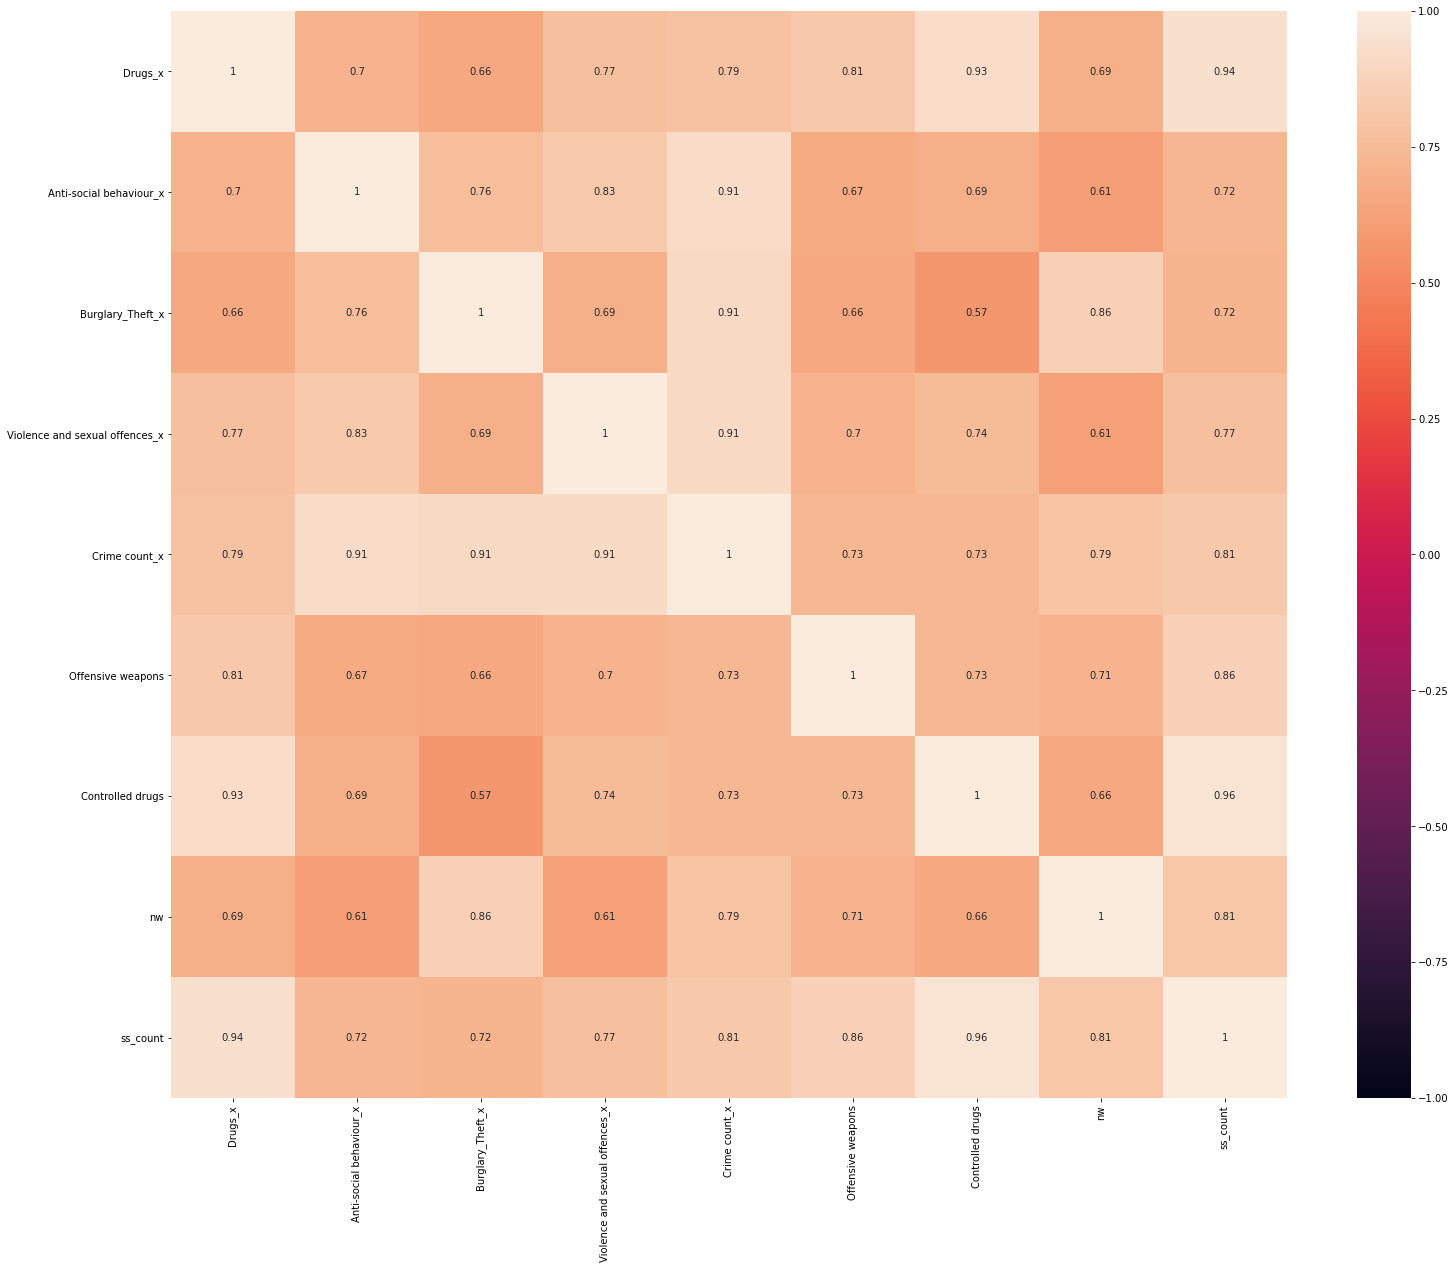

In [33]:
fig = plt.figure()
pearson_df = df
pearson_df['nw'] = pearson_df['Evidence of offences under the Act'] + pearson_df['Stolen goods']
pearson_df['T'] = df['Burglary_Theft_x']-df['Burglary_Theft_y']
pearson_df['D'] = df['Drugs_x']-df['Drugs_y']
pearson_df['A'] = df['Anti-social behaviour_x']-df['Anti-social behaviour_y']
pearson_df['D'] = df['Drugs_x']-df['Drugs_y']
pearson_df = df[['Drugs_x','Anti-social behaviour_x','Burglary_Theft_x','Violence and sexual offences_x','Crime count_x','Offensive weapons','Controlled drugs','nw','ss_count']]
a = pearson_df.corr(method = 'pearson')
hm = sns.heatmap(a, annot=True, vmin=-1, vmax=1)
fig.set_size_inches(25, 20)

In [34]:
# df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# df = df[df.replace([np.inf, -np.inf,0], np.nan).notnull().all(axis=1)]
# df


In [35]:
df

,index,borough,geometry_x,area_x,Anti-social behaviour_x,Bicycle theft_x,Burglary_x,Criminal damage and arson_x,Drugs_x,Other crime_x,Other theft_x,Possession of weapons_x,Public order_x,Robbery_x,Shoplifting_x,Theft from the person_x,Vehicle crime_x,Violence and sexual offences_x,Crime count_x,geometry_y,area_y,Anti-social behaviour_y,Bicycle theft_y,Burglary_y,Criminal damage and arson_y,Drugs_y,Other crime_y,Other theft_y,Possession of weapons_y,Public order_y,Robbery_y,Shoplifting_y,Theft from the person_y,Vehicle crime_y,Violence and sexual offences_y,Crime count_y,month,geometry,Burglary_Theft_x,Burglary_Theft_y,Controlled drugs,Evidence of offences under the Act,Offensive weapons,Stolen goods,ss_count,nw,T,D,A
0,0.0,Kingston upon Thames,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,270.0,73.0,56.0,65.0,60.0,8.0,110.0,6.0,71.0,13.0,47.0,48.0,80.0,259.0,1166.0,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",3.726118e+07,316.0,61.0,63.0,64.0,65.0,12.0,124.0,1.0,76.0,13.0,60.0,64.0,51.0,341.0,1311.0,8,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",239.0,248.0,190.0,5.0,14.0,17.0,227.0,22.0,-9.0,-5.0,-46.0
1,1.0,Croydon,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,931.0,14.0,184.0,208.0,218.0,42.0,315.0,33.0,218.0,67.0,108.0,53.0,403.0,894.0,3688.0,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",8.649444e+07,961.0,20.0,175.0,212.0,156.0,54.0,324.0,20.0,241.0,65.0,122.0,52.0,276.0,979.0,3657.0,8,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",513.0,519.0,580.0,48.0,184.0,78.0,906.0,126.0,-6.0,62.0,-30.0
2,2.0,Bromley,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,496.0,23.0,97.0,137.0,73.0,23.0,161.0,7.0,123.0,20.0,186.0,63.0,244.0,545.0,2198.0,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",1.501349e+08,625.0,13.0,111.0,132.0,87.0,34.0,178.0,6.0,235.0,17.0,152.0,58.0,218.0,621.0,2487.0,8,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",281.0,302.0,336.0,38.0,53.0,68.0,522.0,106.0,-21.0,-14.0,-129.0
3,3.0,Hounslow,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,754.0,46.0,91.0,168.0,97.0,23.0,209.0,10.0,136.0,31.0,64.0,32.0,257.0,683.0,2601.0,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",5.592623e+07,836.0,72.0,95.0,139.0,126.0,25.0,208.0,13.0,212.0,25.0,62.0,37.0,206.0,782.0,2838.0,8,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",346.0,375.0,352.0,19.0,61.0,30.0,468.0,49.0,-29.0,-29.0,-82.0
4,4.0,Ealing,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,978.0,42.0,138.0,158.0,106.0,22.0,218.0,11.0,160.0,44.0,83.0,39.0,398.0,794.0,3191.0,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",5.554435e+07,1043.0,73.0,135.0,157.0,98.0,28.0,219.0,16.0,230.0,42.0,97.0,51.0,364.0,909.0,3462.0,8,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",398.0,427.0,314.0,11.0,65.0,29.0,429.0,40.0,-29.0,8.0,-65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,NaN,Sutton,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,123.0,11.0,37.0,18.0,190.0,29.0,NaN,NaN,NaN
128,NaN,Tower Hamlets,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,509.0,16.0,132.0,45.0,716.0,61.0,NaN,NaN,NaN
129,NaN,Waltham Forest,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,274.0,21.0,70.0,41.0,419.0,62.0,NaN,NaN,NaN
130,NaN,Wandsworth,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,None,NaN,NaN,167.0,23.0,48.0,30.0,274.0,53.0,NaN,NaN,NaN


In [94]:
import statsmodels.api as sm

df = df.dropna(axis=0)

#Crime count
#Anti-social behaviour  
#Violence and sexual offences
#Burglary_Theft
#Drugs
y = np.log(df['Burglary_Theft_x'])
X = df[['nw','Burglary_Theft_y']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Burglary_Theft_x   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     336.0
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           4.47e-44
Time:                        02:29:40   Log-Likelihood:                 38.120
No. Observations:                  99   AIC:                            -70.24
Df Residuals:                      96   BIC:                            -62.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.1360      0.038  

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


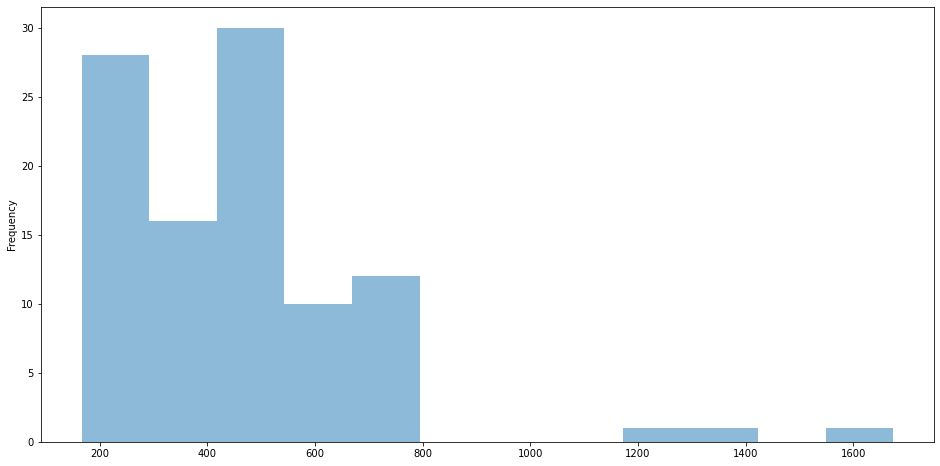

In [97]:
ax = df['Burglary_Theft_x'].plot.hist(bins=12, alpha=0.5)

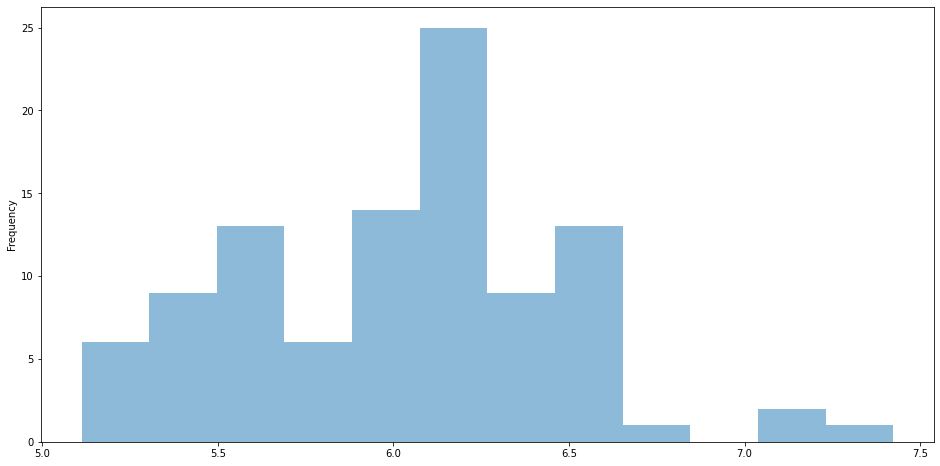

In [98]:
ax = np.log(df['Burglary_Theft_x']).plot.hist(bins=12, alpha=0.5)

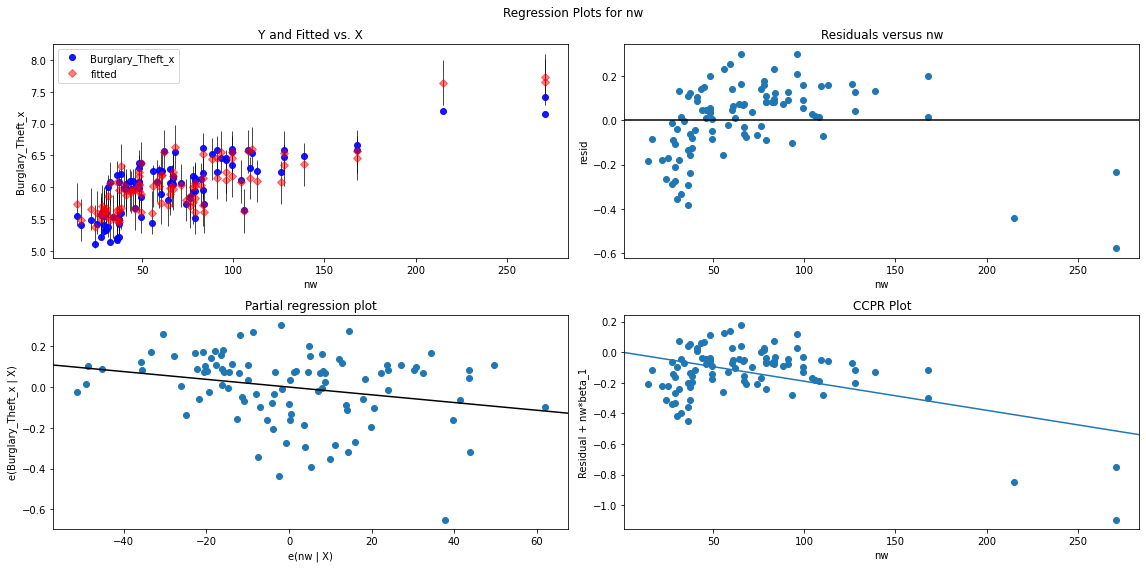

In [96]:
plt.rc("figure", figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(results, "nw")
fig.tight_layout(pad=1.0)
plt.savefig('Burglary_Theft.png')